## Download and install Spark

## Setup environment

In [1]:
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark/..."

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [136]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [55]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('C:\\Users\\shubh\\Downloads\\Crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [5]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [6]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [7]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
StructType([
    StructField('ID',StringType,True),
    StructField('Case Number',StringType, True),
 StructField('Date',TimestampType, True),
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location')
])

In [12]:
labels = [('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',StringType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())]

In [14]:
schema = StructType([StructField (x[0],x[1],True) for x in labels])

In [15]:
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [16]:
rc = spark.read.csv("C:\\Users\\shubh\\Downloads\\Crimes.csv",schema=schema)

In [17]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [18]:
rc.show(5)

+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|nul

#Ran [4] th line again

In [20]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [21]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [22]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [23]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+-------------------+------+
|Case Number|               Date|Arrest|
+-----------+-------------------+------+
|   HY411648|2015-09-05 13:30:00| false|
|   HY411615|2015-09-04 11:30:00| false|
|   JC213529|2018-09-01 00:01:00| false|
|   HY411595|2015-09-05 12:45:00|  true|
+-----------+-------------------+------+
only showing top 4 rows



In [24]:
from pyspark.sql.functions import lit

In [25]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [26]:
rc = rc.drop('IUCR')

In [27]:
rc.show(5)

+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            6

In [40]:
one_day = spark.read.csv('C:\\Users\\shubh\\Downloads\\Crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-11'))

In [41]:
one_day.show(5)

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11504097|   JB511773|2018-11-11 00:00:00|003XX S ST LOUIS AVE|1320|CRIMINAL DAMAGE|          TO VEHICLE|              STREET| false|   false|

In [42]:
one_day.count()

11

#Ran [4] th line again

In [47]:
rc.union(one_day).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [48]:
rc.union(one_day).orderBy('Date',ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11504835|   JB512723|2018-11-11 00:00:00|011XX W GARFIELD ...|1305|     CRIMINAL DAMAGE| CRIMINAL DEFACEMENT|           RESIDE

In [52]:
rc.groupby('Primary Type').count().orderBy('count',ascending=False).show(10)

+-------------------+------+
|       Primary Type| count|
+-------------------+------+
|              THEFT|708619|
|            BATTERY|640815|
|    CRIMINAL DAMAGE|401274|
|          NARCOTICS|332675|
|      OTHER OFFENSE|222873|
|            ASSAULT|218260|
|           BURGLARY|182161|
|MOTOR VEHICLE THEFT|166737|
| DECEPTIVE PRACTICE|138591|
|            ROBBERY|129675|
+-------------------+------+
only showing top 10 rows



In [53]:
#percentage of reported crime that resulted in an arrest

#Ran [4] th line again

In [56]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
|  null|
+------+



In [57]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [59]:
rc.filter(col('Arrest')=='true').count()/rc.select('Arrest').count()

0.2750435528654029

In [60]:
#top 3 locations of crime

In [62]:
rc.groupby('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+------+
|Location Description| count|
+--------------------+------+
|              STREET|936333|
|           RESIDENCE|598683|
|           APARTMENT|322501|
+--------------------+------+
only showing top 3 rows



In [63]:
#inbuilt functions

In [65]:
from pyspark.sql import functions

In [66]:
dir(functions)

['Column',
 'DataFrame',
 'DataType',
 'PandasUDFType',
 'PythonEvalType',
 'SparkContext',
 'StringType',
 'UserDefinedFunction',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_create_column_from_literal',
 '_create_lambda',
 '_create_udf',
 '_get_get_jvm_function',
 '_get_lambda_parameters',
 '_invoke_binary_math_function',
 '_invoke_function',
 '_invoke_function_over_column',
 '_invoke_higher_order_function',
 '_options_to_str',
 '_test',
 '_to_java_column',
 '_to_seq',
 '_unresolved_named_lambda_variable',
 'abs',
 'acos',
 'acosh',
 'add_months',
 'aggregate',
 'approxCountDistinct',
 'approx_count_distinct',
 'array',
 'array_contains',
 'array_distinct',
 'array_except',
 'array_intersect',
 'array_join',
 'array_max',
 'array_min',
 'array_position',
 'array_remove',
 'array_repeat',
 'array_sort',
 'array_union',
 'arrays_overlap',
 'arrays_zip',
 'asc',
 'asc_nulls_first',
 'asc_nulls_last',
 'ascii',
 'asi

In [67]:
from pyspark.sql.functions import lower, upper, substring

In [68]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [72]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [76]:
rc.select(lower(col('Primary Type')),upper(col('primary Type')),substring(col('Primary Type'),1,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [77]:
from pyspark.sql.functions import min, max

In [81]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



In [82]:
from pyspark.sql.functions import date_add, date_sub

In [83]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]



#### 3 days before oldest date and 3 days after newest date

In [87]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



In [88]:
#date functions

In [89]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [93]:
df = spark.createDataFrame([('2022-05-27 13:44:00',)],['May'])
df.show(5)

+-------------------+
|                May|
+-------------------+
|2022-05-27 13:44:00|
+-------------------+



In [94]:
df.select(to_date(col('May'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('May'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------+--------------------------------------+
|to_date(May, yyyy-MM-dd HH:mm:ss)|to_timestamp(May, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2022-05-27|                   2022-05-27 13:44:00|
+---------------------------------+--------------------------------------+



In [95]:
df = spark.createDataFrame([('27/May/2022 13:55:00',)],['May'])

In [96]:
df.select(to_date(col('May'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('May'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------+---------------------------------------+
|to_date(May, dd/MMM/yyyy HH:mm:ss)|to_timestamp(May, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2022-05-27|                    2022-05-27 13:55:00|
+----------------------------------+---------------------------------------+



In [102]:
df = spark.createDataFrame([('05/27/2022 01:58:00 PM',)],['May'])

In [103]:
df.show(1,truncate=False)

+----------------------+
|May                   |
+----------------------+
|05/27/2022 01:58:00 PM|
+----------------------+



In [110]:
df.select(to_date(col('May'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('May'),'MM/dd/yyyy hh:mm:ss a')).show(1)

+-----------------------------------+----------------------------------------+
|to_date(May, MM/dd/yyyy hh:mm:ss a)|to_timestamp(May, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------+----------------------------------------+
|                         2022-05-27|                     2022-05-27 13:58:00|
+-----------------------------------+----------------------------------------+



In [112]:
nrc = spark.read.csv('C:\\Users\\shubh\\Downloads\\Crimes.csv',header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

In [113]:
ps = spark.read.csv('C:\\Users\\shubh\\Downloads\\Police_Stations.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [114]:
rc.cache()

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [115]:
rc.count()

3433758

In [116]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [121]:
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|    null|
|     021|
+--------+



In [118]:
from pyspark.sql.functions import lpad

In [119]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [120]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [126]:
ps = ps.withColumn('Format_District', lpad(col('DISTRICT'),3,'0'))

In [127]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|

In [129]:
ps.select('Format_District').collect()

[Row(Format_District='Hea'),
 Row(Format_District='018'),
 Row(Format_District='019'),
 Row(Format_District='020'),
 Row(Format_District='022'),
 Row(Format_District='024'),
 Row(Format_District='025'),
 Row(Format_District='001'),
 Row(Format_District='002'),
 Row(Format_District='003'),
 Row(Format_District='004'),
 Row(Format_District='005'),
 Row(Format_District='006'),
 Row(Format_District='007'),
 Row(Format_District='008'),
 Row(Format_District='009'),
 Row(Format_District='010'),
 Row(Format_District='011'),
 Row(Format_District='012'),
 Row(Format_District='",C'),
 Row(Format_District='014'),
 Row(Format_District='015'),
 Row(Format_District='016'),
 Row(Format_District='017')]

In [132]:
ps = ps.drop('Format District')

In [133]:
rc.join(ps, rc.District == ps.Format_District,'left_outer').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+--------+

In [134]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District']

In [135]:
rc.join(ps, rc.District == ps.Format_District,'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_District').show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|
|10224739|   HY411615|2015-09-04 11:30:00| 008XX N CENTRAL AVE|0870|    

In [139]:
rc.select(col('Primary Type')).distinct().count()

37

In [142]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(37, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|null                             |
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                  

In [143]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [144]:
nc.show(10)

+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|      Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|NON - CRIMINAL|FOID - REVOCATION|           RESIDENCE|  true|   false|1513|     015|  

In [147]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |81   |
|FOID - REVOCATION                          |50   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |6    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|6    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|FOUND PASSPORT                             |2    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |1    |
+-------------------------------------------+-----+



In [148]:
from pyspark.sql.functions import dayofweek

In [149]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    .. versionadded:: 2.3.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [150]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [151]:
from pyspark.sql.functions import date_format

In [152]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]



In [153]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [156]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+------+
|date_format(Date, E)| count|
+--------------------+------+
|                 Fri|514882|
|                 Wed|494583|
|                 Sat|491411|
|                 Thu|491347|
|                 Tue|491341|
|                 Mon|486633|
|                 Sun|463561|
+--------------------+------+



In [157]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=463561),
 Row(date_format(Date, E)='Mon', count=486633),
 Row(date_format(Date, E)='Thu', count=491347),
 Row(date_format(Date, E)='Sat', count=491411),
 Row(date_format(Date, E)='Wed', count=494583),
 Row(date_format(Date, E)='Fri', count=514882),
 Row(date_format(Date, E)='Tue', count=491341)]

In [158]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]

In [159]:
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [160]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]

In [161]:
cnt

[463561, 486633, 491347, 491411, 494583, 514882, 491341]

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
cp = pd.DataFrame({'Day_of_week':dow,'Count':cnt})

In [166]:
cp

,Day_of_week,Count
0,Sun,463561
1,Mon,486633
2,Thu,491347
3,Sat,491411
4,Wed,494583
5,Fri,514882
6,Tue,491341


Text(0.5, 1.0, 'No of reported crimes per day of week from 2001 to 2018')

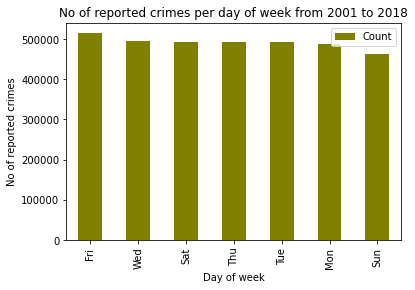

In [170]:
cp.sort_values('Count', ascending=False).plot(kind='bar',x='Day_of_week', y='Count', color='olive');
plt.xlabel('Day of week')
plt.ylabel('No of reported crimes')
plt.title('No of reported crimes per day of week from 2001 to 2018')

## RDD

In [171]:
psrdd = sc.textFile('C:\\Users\\shubh\\Downloads\\Police_Stations.csv')

In [172]:
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [176]:
ps_header = psrdd.first()

In [177]:
ps_rest = psrdd.filter(lambda line: line!=ps_header)

In [178]:
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [179]:
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [180]:
ps_rest.map(lambda line: line.split(',')).count()

24

In [184]:
(ps_rest.filter(lambda line: line.split(',')[0]=='7').
map(lambda line:(line.split(',')[0],
    line.split(',')[1],
    line.split(',')[2],
    line.split(',')[5]
   )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]

In [187]:
(ps_rest.filter(lambda line:line.split(',')[0] in ['10','11']).
map(lambda line:(line.split(',')[1],
           line.split(',')[2],
           line.split(',')[5]
           )
)).collect()

[('Ogden', '3315 W Ogden Ave', '60623'),
 ('Harrison', '3151 W Harrison St', '60612')]